In [48]:
# imports and defines
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from itertools import product

DATA_PATH = "Data/" # path to folder with data

In [49]:
# Loading dataset with BTC prices.
btc_price = pd.read_csv(DATA_PATH + 'BTC_data.csv', low_memory = False)
btc_price['timestamp'] = pd.to_datetime(btc_price['timestamp']).dt.tz_localize(None)
print(btc_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        720 non-null    datetime64[ns]
 1   price            720 non-null    float64       
 2   returns          720 non-null    float64       
 3   squared_returns  720 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 22.6 KB
None


In [50]:
# FIT ARIMA(1,1,1)
model = ARIMA(btc_price['returns'], order=(1,1,1)) # (p,d,q)
model_fit = model.fit()
residuals = ARIMA_model_fit.resid

<Figure size 600x400 with 0 Axes>

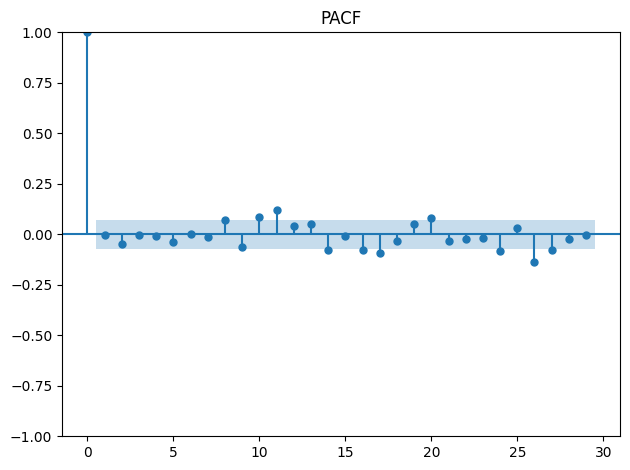

<Figure size 600x400 with 0 Axes>

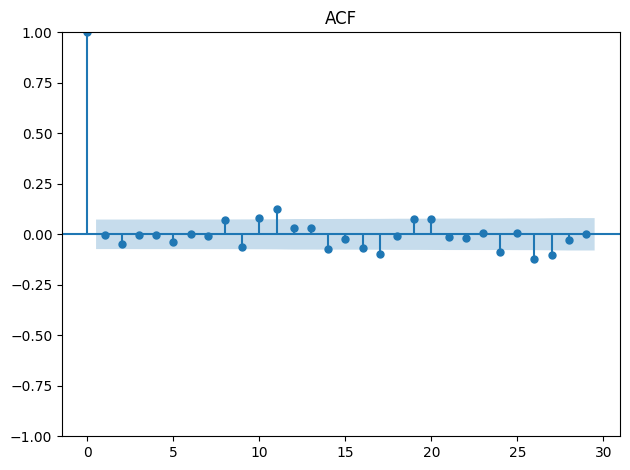

In [51]:
# Plot PACF for the squared returns
plt.figure(figsize=(6, 4)) 
plot_pacf(residuals, title="PACF")  # p value
plt.tight_layout()
plt.show()

# Plot ACF for the squared returns
plt.figure(figsize=(6, 4))
plot_acf(residuals, title="ACF")  # q value
plt.tight_layout()
plt.show()

In [52]:
# FIT Garch(1,1)
model = arch_model(residuals, vol='Garch', p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3819.2573020688533
Iteration:      2,   Func. Count:     16,   Neg. LLF: 132914204723.24141
Iteration:      3,   Func. Count:     24,   Neg. LLF: 700613.4906639036
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1573.6395372010047
Iteration:      5,   Func. Count:     37,   Neg. LLF: 928.2280378327541
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1600.8974381555613
Iteration:      7,   Func. Count:     50,   Neg. LLF: 911.9366674354724
Iteration:      8,   Func. Count:     56,   Neg. LLF: 911.8771802890052
Iteration:      9,   Func. Count:     61,   Neg. LLF: 911.8771445798375
Iteration:     10,   Func. Count:     65,   Neg. LLF: 911.8771445797323
Optimization terminated successfully    (Exit mode 0)
            Current function value: 911.8771445798375
            Iterations: 10
            Function evaluations: 65
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -911.877
Distribution:                  Normal   AIC:                           1831.75
Method:            Maximum Likelihood   BIC:                           1850.07
                                        No. Observations:                  719
Date:                Sun, Dec 10 2023   Df Residuals:                      718
Time:                        00:54:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0549  2.591e-02      2.118  3.417e-02 [4.096e-03,  0.106]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0220  8.594e-03      2.564  1.034e-02 [5.193e-03,3.888e-02]
alpha[1]       0.0805  2.148e-02      3.748  1.783e-04   [3.840e-02,  0.123]
beta[1]        0.8994  1.837e-02     48.957      0.000     [  0.863,  0.935]
============================================================================

Covariance estimator: robust
"""

In [53]:
# FIT Garch(1,2)
model = arch_model(residuals, vol='Garch', p=1, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3752.4165848300163
Iteration:      2,   Func. Count:     18,   Neg. LLF: 152162446466.77353
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1461.7871635919191
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1080.7643110031945
Iteration:      5,   Func. Count:     43,   Neg. LLF: 914.5423305409192
Iteration:      6,   Func. Count:     50,   Neg. LLF: 913.661309663944
Iteration:      7,   Func. Count:     57,   Neg. LLF: 911.8861446320358
Iteration:      8,   Func. Count:     63,   Neg. LLF: 911.8791620083261
Iteration:      9,   Func. Count:     69,   Neg. LLF: 911.8775546778279
Iteration:     10,   Func. Count:     75,   Neg. LLF: 911.8771467848987
Iteration:     11,   Func. Count:     81,   Neg. LLF: 911.8771447132087
Iteration:     12,   Func. Count:     86,   Neg. LLF: 911.8771447996263
Optimization terminated successfully    (Exit mode 0)
            Current function value: 911.8771447132087
            Iterations: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -911.877
Distribution:                  Normal   AIC:                           1833.75
Method:            Maximum Likelihood   BIC:                           1856.64
                                        No. Observations:                  719
Date:                Sun, Dec 10 2023   Df Residuals:                      718
Time:                        00:54:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0549  2.552e-02      2.151  3.149e-02 [4.871e-03,  0.105]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0220  3.382e-02      0.652      0.515 [-4.425e-02,8.832e-02]
alpha[1]       0.0805      0.138      0.583      0.560      [ -0.190,  0.351]
beta[1]        0.8994      1.811      0.497      0.619      [ -2.651,  4.449]
beta[2]        0.0000      1.653      0.000      1.000      [ -3.239,  3.239]
=============================================================================

Covariance estimator: robust
"""

In [54]:
# FIT Garch(2,1)
model = arch_model(residuals, vol='Garch', p=2, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3773.9221317738393
Iteration:      2,   Func. Count:     18,   Neg. LLF: 162103952298.5111
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1443.0488417879355
Iteration:      4,   Func. Count:     36,   Neg. LLF: 1463.9631402457676
Iteration:      5,   Func. Count:     43,   Neg. LLF: 961.3890255333838
Iteration:      6,   Func. Count:     50,   Neg. LLF: 909.5753347418893
Iteration:      7,   Func. Count:     57,   Neg. LLF: 911.3665891890953
Iteration:      8,   Func. Count:     64,   Neg. LLF: 908.7009000626327
Iteration:      9,   Func. Count:     71,   Neg. LLF: 908.682638116851
Iteration:     10,   Func. Count:     77,   Neg. LLF: 908.6826219048825
Iteration:     11,   Func. Count:     82,   Neg. LLF: 908.6826219048954
Optimization terminated successfully    (Exit mode 0)
            Current function value: 908.6826219048825
            Iterations: 11
            Function evaluations: 82
            Gradient evaluations: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -908.683
Distribution:                  Normal   AIC:                           1827.37
Method:            Maximum Likelihood   BIC:                           1850.25
                                        No. Observations:                  719
Date:                Sun, Dec 10 2023   Df Residuals:                      718
Time:                        00:54:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0532  2.555e-02      2.081  3.741e-02 [3.100e-03,  0.103]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0260  1.059e-02      2.454  1.413e-02  [5.232e-03,4.675e-02]
alpha[1]       0.0178  1.770e-02      1.006      0.314 [-1.688e-02,5.250e-02]
alpha[2]       0.0753  3.412e-02      2.208  2.727e-02    [8.450e-03,  0.142]
beta[1]        0.8826  2.612e-02     33.793 2.530e-250      [  0.831,  0.934]
=============================================================================

Covariance estimator: robust
"""

In [55]:
# FIT Garch(2,2)
model = arch_model(residuals, vol='Garch', p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3493.673349449685
Iteration:      2,   Func. Count:     20,   Neg. LLF: 119387923122.29074
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1243.477644012326
Iteration:      4,   Func. Count:     39,   Neg. LLF: 1275.864316054956
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1455.6523873781166
Iteration:      6,   Func. Count:     56,   Neg. LLF: 909.6767745096787
Iteration:      7,   Func. Count:     63,   Neg. LLF: 908.9803088257293
Iteration:      8,   Func. Count:     70,   Neg. LLF: 908.7819506264906
Iteration:      9,   Func. Count:     77,   Neg. LLF: 908.7057521566812
Iteration:     10,   Func. Count:     84,   Neg. LLF: 908.683932431174
Iteration:     11,   Func. Count:     91,   Neg. LLF: 908.6826992329106
Iteration:     12,   Func. Count:     98,   Neg. LLF: 908.6826282348379
Iteration:     13,   Func. Count:    105,   Neg. LLF: 908.682624248825
Iteration:     14,   Func. Count:    112,   Neg. LLF: 908.682621

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -908.683
Distribution:                  Normal   AIC:                           1829.37
Method:            Maximum Likelihood   BIC:                           1856.83
                                        No. Observations:                  719
Date:                Sun, Dec 10 2023   Df Residuals:                      718
Time:                        00:54:25   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0532  2.851e-02      1.865  6.219e-02 [-2.710e-03,  0.109]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0260  2.640e-02      0.985      0.325 [-2.575e-02,7.773e-02]
alpha[1]       0.0178  2.313e-02      0.770      0.441 [-2.753e-02,6.315e-02]
alpha[2]       0.0753  7.123e-02      1.057      0.290   [-6.428e-02,  0.215]
beta[1]        0.8826      1.054      0.837      0.402      [ -1.183,  2.948]
beta[2]        0.0000      0.951      0.000      1.000      [ -1.864,  1.864]
=============================================================================

Covariance estimator: robust
"""

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for rein

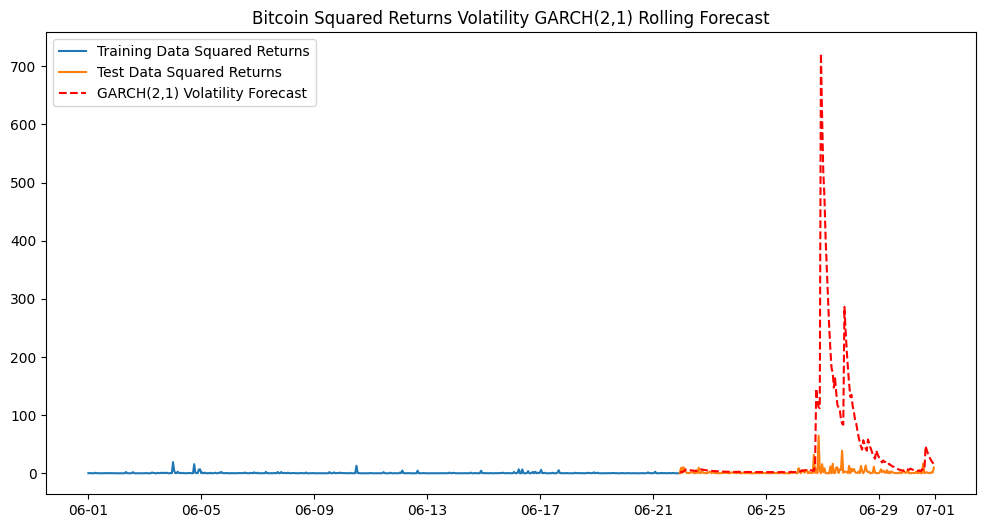

In [56]:
# GARCH model

train_size = int(len(btc_price) * 0.7)
train, test = btc_price['squared_returns'][0:train_size], btc_price['squared_returns'][train_size:]

history = [x for x in train]
vol_predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = arch_model(history, vol='Garch', p=2, q=1) # GARCH(2,1)
    model_fit = model.fit(disp='off')
    forecast = model_fit.forecast(horizon=1)
    vol_predictions.append(forecast.variance.values[-1, 0])  # Last forecast variance value
    history.append(test.iloc[t])  # Add actual observation to history for the next iteration

# Plot
plt.figure(figsize=(12, 6))
plt.plot(btc_price.timestamp[:train_size], train, label='Training Data Squared Returns')
plt.plot(btc_price.timestamp[train_size:], test, label='Test Data Squared Returns')
plt.plot(btc_price.timestamp[train_size:], vol_predictions, label='GARCH(2,1) Volatility Forecast', color='red', linestyle='--')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(loc='upper left')
plt.title("Bitcoin Squared Returns Volatility GARCH(2,1) Rolling Forecast")
plt.show()

/var/folders/2l/x9l_3hq13nbfr62mh9x_fsmh0000gn/T/ipykernel_82949/221459670.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(new_row, ignore_index=True)
/var/folders/2l/x9l_3hq13nbfr62mh9x_fsmh0000gn/T/ipykernel_82949/221459670.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(new_row, ignore_index=True)
/var/folders/2l/x9l_3hq13nbfr62mh9x_fsmh0000gn/T/ipykernel_82949/221459670.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(new_row, ignore_index=True)
/var/folders/2l/x9l_3hq13nbfr62mh9x_fsmh0000gn/T/ipykernel_82949/221459670.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas

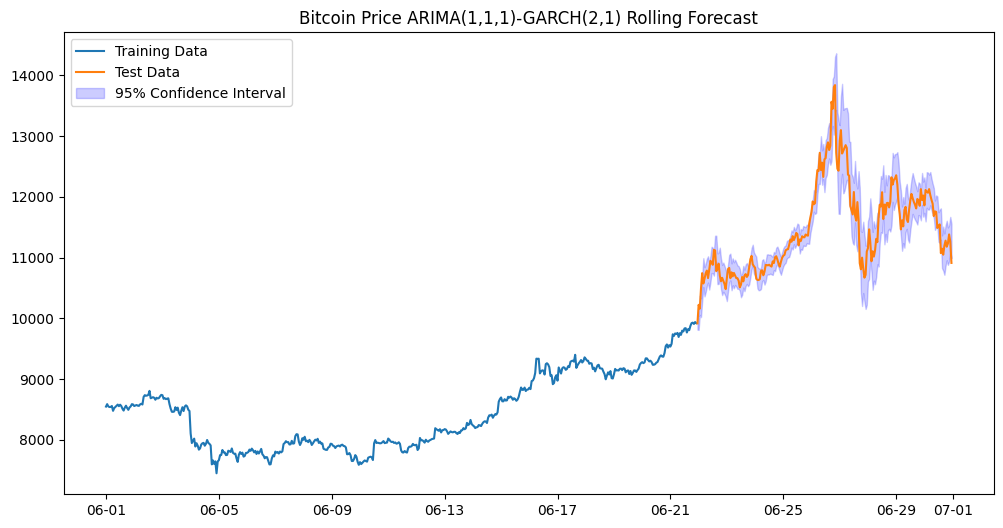

Mean Squared Error: 38254.39
Root Mean Squared Error: 195.59
Mean Absolute Percentage Error: 1.14


In [57]:
# ARIMA(1,1,1)-GARCH(2,1)

train_size = int(len(btc_price) * 0.7)
train, test = btc_price['returns'][0:train_size], btc_price['returns'][train_size:]
train_price, test_price = btc_price['price'][0:train_size], btc_price['price'][train_size:]

history = [x for x in train]
predictions = pd.DataFrame(columns=['returns', 'lower_bound', 'upper_bound'])

# Rolling forecast
for t in range(len(test)):
    # ARIMA Model
    ARIMA_model = ARIMA(history, order=(1,1,1))  # (p,d,q)
    ARIMA_model_fit = ARIMA_model.fit()
    arima_forecast = ARIMA_model_fit.forecast(steps=1)
    
    # Get ARIMA residuals for GARCH
    residuals = ARIMA_model_fit.resid
    
    # GARCH Model
    GARCH_model = arch_model(residuals, vol='Garch', p=2, q=1)
    GARCH_model_fit = GARCH_model.fit(disp='off')
    garch_forecast = GARCH_model_fit.forecast(start=0, horizon=1, reindex=False)
    
    # Combining the forecasts
    lower_bound = arima_forecast[0] - 1.96 * np.sqrt(garch_forecast.variance.values[-1,:][0])
    upper_bound = arima_forecast[0] + 1.96 * np.sqrt(garch_forecast.variance.values[-1,:][0])
    new_row = {'returns':arima_forecast[0], 'lower_bound':lower_bound, 'upper_bound':upper_bound}
    predictions = predictions.append(new_row, ignore_index=True)
    
    history.append(test.iloc[t])  # Add actual observation to history for the next iteration

# Convert the predicted returns to price levels
predicted_prices = pd.DataFrame(columns=['price', 'lower_bound', 'upper_bound'])

for idx, (index, predicted_values) in enumerate(predictions.iterrows()):
    actual_price = test_price.iloc[idx-1] if idx > 0 else train_price.iloc[-1] # Use the last actual price
    price = actual_price * (1 + predicted_values['returns']/100)
    lower_bound = actual_price * (1 + predicted_values['lower_bound']/100)
    upper_bound = actual_price * (1 + predicted_values['upper_bound']/100)
    new_row = {'price':price, 'lower_bound':lower_bound, 'upper_bound':upper_bound}
    predicted_prices = predicted_prices.append(new_row, ignore_index=True)

# Plots
plt.figure(figsize=(12, 6))
plt.plot(btc_price.timestamp[:train_size], train_price, label='Training Data')
plt.plot(btc_price.timestamp[train_size:], test_price, label='Test Data')
# plt.plot(btc_price.timestamp[train_size:], predicted_prices['price'], label='ARIMA-GARCH Forecast', color='red', linestyle='--')
plt.fill_between(btc_price.timestamp[train_size:], predicted_prices['lower_bound'], predicted_prices['upper_bound'], color='blue', alpha=0.2, label="95% Confidence Interval")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(loc='upper left')
plt.title("Bitcoin Price ARIMA(1,1,1)-GARCH(2,1) Rolling Forecast")
plt.show()

# Calculate MSE
mse = round(mean_squared_error(test_price, predicted_prices['price']), 2)
print('Mean Squared Error:', mse)

# Calculate RMSE
rmse = round(np.sqrt(mse), 2)
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
prices_array = predicted_prices['price'].to_numpy()
mape = round(np.mean(np.abs((test_price - prices_array) / test_price)) * 100, 2)
print('Mean Absolute Percentage Error:', mape)

Trading strategy - Volatility Breakout Strategy:
- Long: If ARIMA predicts a higher closing price and GARCH volatility prediction is above the mean volatility prediction from the last 12 candles.
- Short: If ARIMA predicts a lower closing price and GARCH volatility prediction is above the mean volatility prediction from the last 12 candles.
- No Action: If GARCH volatility prediction is below the mean volatility prediction from the last 12 candles.

/var/folders/2l/x9l_3hq13nbfr62mh9x_fsmh0000gn/T/ipykernel_82949/3275926116.py:23: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  strategy_returns = signals[1:] * returns[last_candles-1:]  # align with the shifted signal


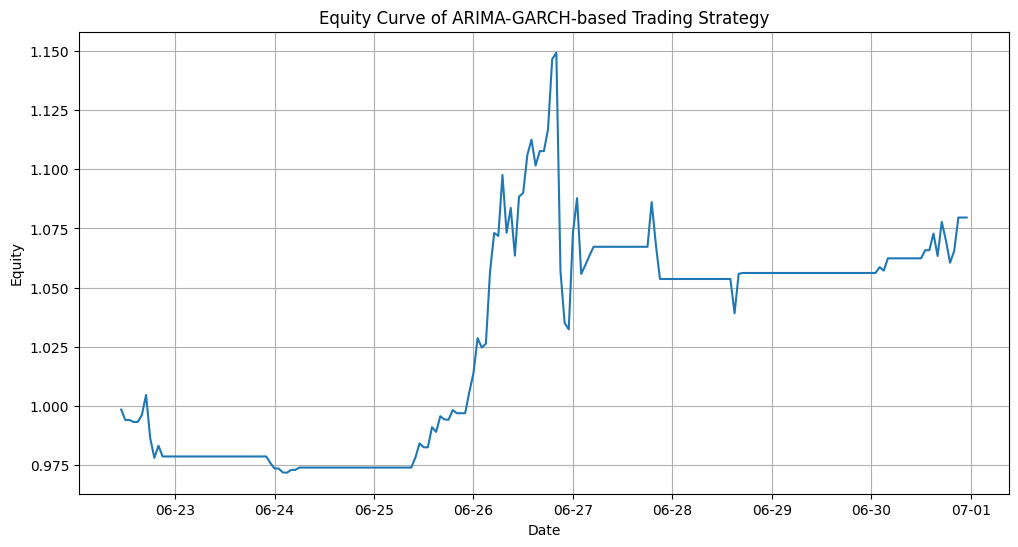

In [58]:
# Simple trading strategy test - Volatility Breakout Strategy

last_candles = 12

signals = [0]  # start with no action
for i in range(last_candles, len(predicted_prices)):
    pred_vol = (predicted_prices['upper_bound'][i]-predicted_prices['lower_bound'][i])
    mean_vol = (predicted_prices['upper_bound'][i-last_candles:i]-predicted_prices['lower_bound'][i-last_candles:i]).mean()
    if predicted_prices['price'][i] > test_price.iloc[i-1]:
        if (pred_vol > mean_vol):
            signals.append(1)
        else:
            signals.append(0)
    elif predicted_prices['price'][i] < test_price.iloc[i-1]:
        if (pred_vol > mean_vol):
            signals.append(-1)
        else:
            signals.append(0)
    else:
        signals.append(0)

returns = test_price.pct_change().dropna()  # daily returns
strategy_returns = signals[1:] * returns[last_candles-1:]  # align with the shifted signal

equity_curve = (1 + strategy_returns).cumprod()

# Plot
plt.figure(figsize=(12,6))
plt.plot(btc_price.timestamp[train_size+last_candles:], equity_curve)
plt.title('Equity Curve of ARIMA-GARCH-based Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Equity')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.grid(True)
plt.show()